# SIED+ endpoints


## IDs Harcodeados

Regiones

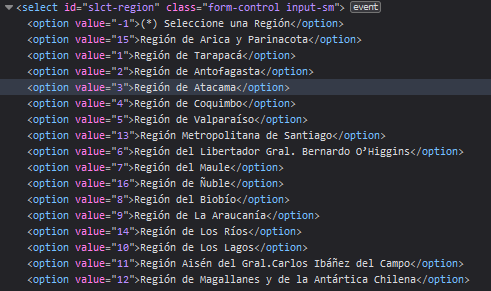



Provincias

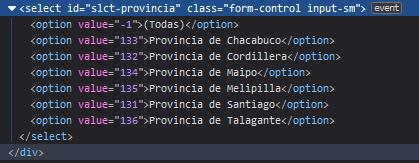

Grupo Delictual

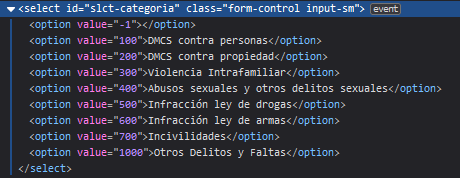

Delitos

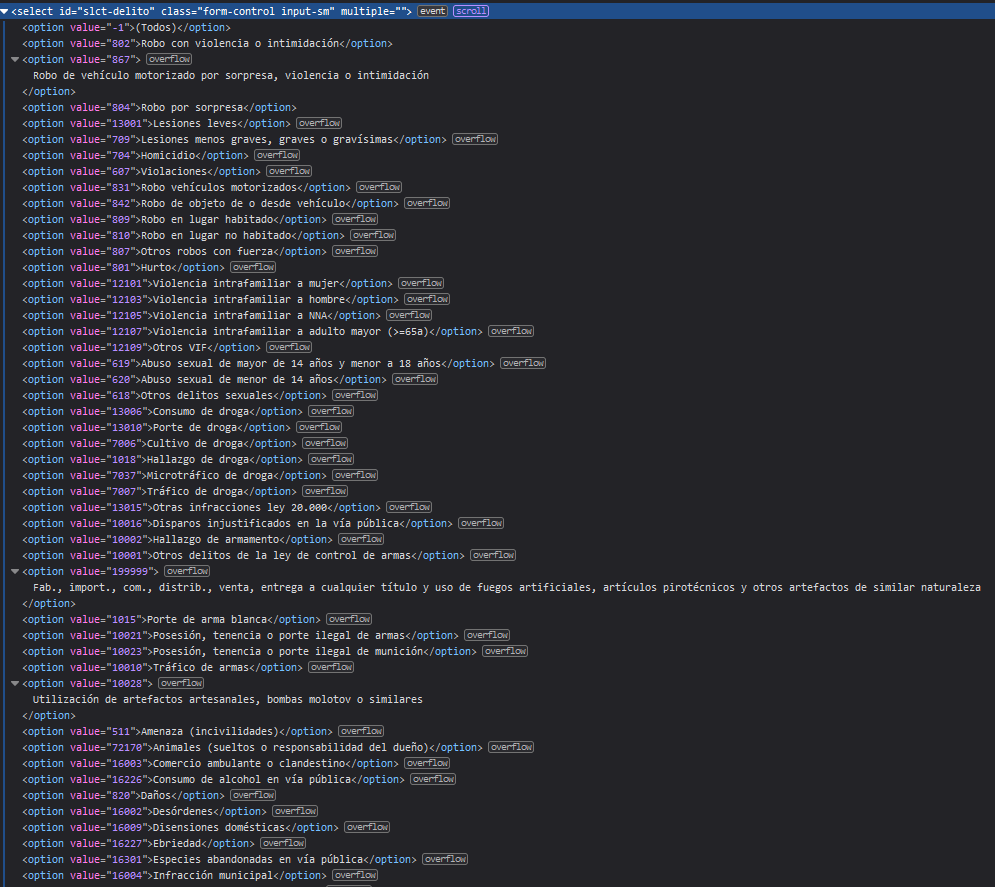

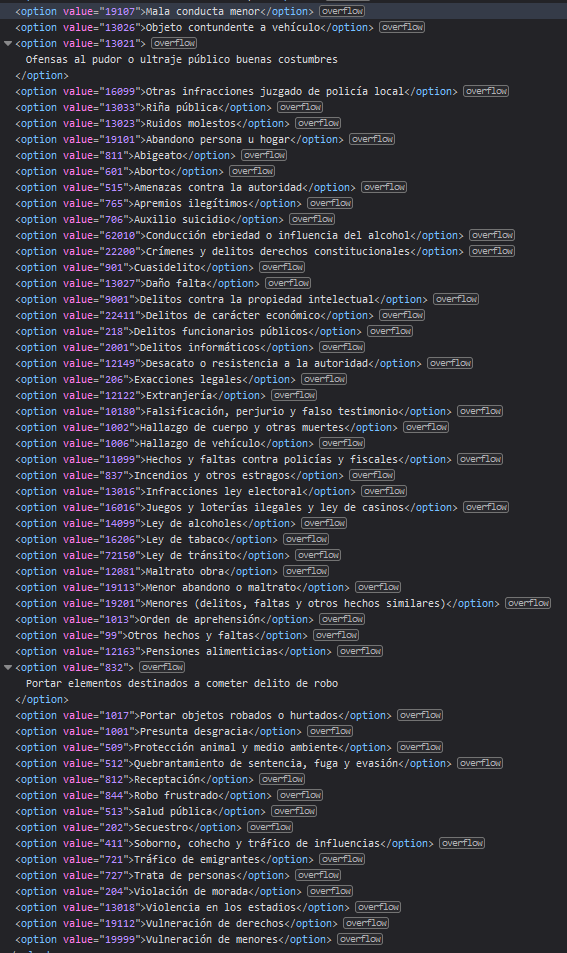


Rango Horario

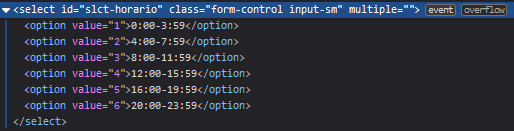

Año: de 2013 hasta 2022

Meses: del 1 al 12

In [72]:
REGIONES = {"Todo": -1, 
            "Región de Arica y Parinacota": 15, 
            "Región de Tarapacá": 1, 
            "Región de Antofagasta": 2, 
            "Región de Atacama": 3, 
            "Región de Coquimbo": 4,
            "Región de Valparaíso": 5,
            "Región del Libertador Gral. Bernardo O’Higgins": 6,
            "Región del Maule": 7,
            "Región del Biobío": 8,
            "Región de La Araucanía": 9,
            "Región de Los Lagos": 10,
            "Región Aisén del Gral.Carlos Ibáñez del Campo": 11,
            "Región de Magallanes y de la Antártica Chilena": 12,
            "Región Metropolitana de Santiago": 13,
            "Región de Los Ríos": 14,
            "Región de Ñuble": 16,
}
PROVINCIAS = {"Todo": -1, 
            "Provincia de Chacabuco": 133, 
            "Provincia de Cordillera": 132, 
            "Provincia de Maipo": 134, 
            "Provincia de Melipilla": 135, 
            "Provincia de Santiago": 131,
            "Provincia de Talagante": 136,
}
GRUPO_DELICTUAL = {"Todo": -1, 
            "DMCS contra personas": 100, 
            "DMCS contra propiedad": 200, 
            "Violencia Intrafamiliar": 300, 
            "Abusos sexuales y otros delitos sexuales": 400, 
            "Infracción ley de drogas": 500,
            "Infracción ley de armas": 600,
            "Incivilidades": 700,
            "Otros Delitos y Faltas": 1000

}

# TODO copiar el resto
DELITOS = {
    "Todo": -1
}

AÑOS = [i for i in range (2013,2023)]
MESES = [i for i in range (1,12)]
RANGO_HORARIO = [i for i in range (1,6)]

## Imports y variables de entorno

In [105]:
import requests
import pandas as pd
import numpy as np
from time import sleep
import pickle

url = "https://siedt.spd.gov.cl/"
user = "estacionspd5"
psw = "3tmMWeC3"

def parse_options(options):
    """
    Parsea un objeto options de html en forma string a un diccionario.
    """
    options = options.split("</option>")
    options = [option.split(">") for option in options]
    options = [(option[1], option[0].split("value=")[1]) for option in options if len(option) == 2]
    options = {option[0]: option[1] for option in options}
    return options


# INICIAR SESIÓN MANUALMENTE Y COPIAR LOS VALORES DE ESTAS COOKIES
cookies = {
    '546G65YGFHghfU65': '6282b4e2599b5794a2df984825f10b20',
    'ci_session': 'rqo38ni06r5q3h5g7et2r4vjespa4499',
}

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/111.0',
    'Accept': '*/*',
    'Accept-Language': 'en-US,en;q=0.5',
    'Content-Type': 'application/x-www-form-urlencoded; charset=UTF-8',
    'X-Requested-With': 'XMLHttpRequest',
    'Origin': 'https://siedt.spd.gov.cl',
    'Connection': 'keep-alive',
    'Referer': 'https://siedt.spd.gov.cl/',
    'Sec-Fetch-Dest': 'empty',
    'Sec-Fetch-Mode': 'cors',
    'Sec-Fetch-Site': 'same-origin',
}

## POST lista de valores

Lista todos los valores existentes del campo field.

endpoint:

https://siedt.spd.gov.cl/index.php/app/get_values_list/

Ej body:

field=Comuna&value_default=(Todas)&parent_id=131

field=Barrio&value_default=_&parent_id=13108


body en modo form:

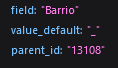

### Obteniendo el identificador de todos las comunas y barrios de cada comuna de la Provincia de Santiago (131)

In [74]:
# data = 'field=Comuna&value_default=(Todas)&parent_id=131'

# response_comunas = requests.post('https://siedt.spd.gov.cl/index.php/app/get_values_list/', cookies=cookies, headers=headers, data=data)
# comunas = parse_options(response_comunas.text)

comunas = {'(Todas)': '-1', 'Cerrillos': '13102', 'Cerro Navia': '13103', 'Conchalí': '13104', 'El Bosque': '13105', 'Estación Central': '13106', 'Huechuraba': '13107', 'Independencia': '13108', 'La Cisterna': '13109', 'La Florida': '13110', 'La Granja': '13111', 'La Pintana': '13112', 'La Reina': '13113', 'Las Condes': '13114', 'Lo Barnechea': '13115', 'Lo Espejo': '13116', 'Lo Prado': '13117', 'Macul': '13118', 'Maipú': '13119', 'Ñuñoa': '13120', 'Pedro Aguirre Cerda': '13121', 'Peñalolén': '13122', 'Providencia': '13123', 'Pudahuel': '13124', 'Quilicura': '13125', 'Quinta Normal': '13126', 'Recoleta': '13127', 'Renca': '13128', 'San Joaquín': '13129', 'San Miguel': '13130', 'San Ramón': '13131', 'Santiago': '13101', 'Vitacura': '13132'}
print(comunas)

{'(Todas)': '-1', 'Cerrillos': '13102', 'Cerro Navia': '13103', 'Conchalí': '13104', 'El Bosque': '13105', 'Estación Central': '13106', 'Huechuraba': '13107', 'Independencia': '13108', 'La Cisterna': '13109', 'La Florida': '13110', 'La Granja': '13111', 'La Pintana': '13112', 'La Reina': '13113', 'Las Condes': '13114', 'Lo Barnechea': '13115', 'Lo Espejo': '13116', 'Lo Prado': '13117', 'Macul': '13118', 'Maipú': '13119', 'Ñuñoa': '13120', 'Pedro Aguirre Cerda': '13121', 'Peñalolén': '13122', 'Providencia': '13123', 'Pudahuel': '13124', 'Quilicura': '13125', 'Quinta Normal': '13126', 'Recoleta': '13127', 'Renca': '13128', 'San Joaquín': '13129', 'San Miguel': '13130', 'San Ramón': '13131', 'Santiago': '13101', 'Vitacura': '13132'}


In [75]:
# barrios_por_comuna = {}
# for comuna in comunas:
#   if comuna != '(Todas)':
#     data = 'field=Barrio&value_default=_&parent_id=' + comunas[comuna]
#     response_comunas = requests.post('https://siedt.spd.gov.cl/index.php/app/get_values_list/', cookies=cookies, headers=headers, data=data)
#     barrios = parse_options(response_comunas.text)
#     # Eliminamos la llave general de barrios
#     try:
#       barrios.pop('(*) No utilizar Barrios')
#     except KeyError as ex:
#       print("No existe la llave")

#     barrios_por_comuna[comuna] = [comunas[comuna], barrios]
#     sleep(1)

# Guardamos esta request en un diccionario para no tener que hacer la request
# with open('/content/drive/MyDrive/Universidad/Ipre/barrios_por_comuna.pickle', 'rb') as handle:
#     barrios_por_comuna = pickle.load(handle)
# total = 0
# for comuna in barrios_por_comuna:
#   print('Comuna: {:<20} ID: {:<10} #barrios: {:<10}'.format(comuna, barrios_por_comuna[comuna][0], len( barrios_por_comuna[comuna][1])))
#   total += len(barrios_por_comuna[comuna][1])
# print("Total de barrios en Santiago: ", total)


## GET poligono de un feature.

https://siedt.spd.gov.cl/index.php/app/get_feature/#Field/#ID

Field puede ser Provincia, Barrio o Comuna.

In [66]:
# Ejemplo
# response = requests.get(url + "index.php/app/get_feature/Barrio/1642", cookies=cookies)
# geometry = response.json()['features'][0]['geometry']
# print(geometry)

{'type': 'MultiPolygon', 'coordinates': [[[[-70.6496678042572, -33.5801528912381], [-70.6498710453209, -33.5812002396214], [-70.6504378586324, -33.581120425753], [-70.6505909049572, -33.5810988745929], [-70.6505645154794, -33.5809260486983], [-70.6505601860748, -33.5809179579423], [-70.6505389973701, -33.5807870819485], [-70.6505180870798, -33.5806560791459], [-70.6505116136503, -33.5806158108553], [-70.6505051426472, -33.580575557393], [-70.6504986704411, -33.5805352965154], [-70.650477559976, -33.5804039766411], [-70.650456425608, -33.5802725077161], [-70.6504499530419, -33.5802322442331], [-70.6504434804678, -33.5801919807296], [-70.6504370079077, -33.5801517172702], [-70.6504168324411, -33.5800262122854], [-70.6504161940446, -33.5800222410227], [-70.6502616813626, -33.5800430020317], [-70.6502139313501, -33.5800494178943], [-70.6501661702164, -33.5800558352319], [-70.6501184081644, -33.5800622526736], [-70.6500706503038, -33.5800686695328], [-70.6500228924611, -33.5800750863703], [

Obtener los polígonos de cada barrio.

In [112]:
# Modificamos barrios_por_comuna para agregarle las coordenadas de cada polígono
# for comuna in barrios_por_comuna:
#   barrios = barrios_por_comuna[comuna][1]
#   for barrio in barrios:
#     id_barrio = barrios[barrio]
#     query = url + f'index.php/app/get_feature/Barrio/{id_barrio}'
#     response = requests.get(query, cookies=cookies)
#     geometry = response.json()['features'][0]['geometry']
#     barrios_por_comuna[comuna][1][barrio] = [id_barrio, geometry]

# with open('/content/drive/MyDrive/Universidad/Ipre/barrios_por_comuna_v2.pickle', 'wb') as handle:
#     pickle.dump(barrios_por_comuna, handle, protocol=pickle.HIGHEST_PROTOCOL)

# with open('/content/drive/MyDrive/Universidad/Ipre/barrios_por_comuna_v2.pickle', 'rb') as handle:
#     barrios_por_comuna = pickle.load(handle)

## GET Delitos

https://siedt.spd.gov.cl/index.php/app/find_points

Ej body:

1. Sin grupo delictual, con todos los delitos, sin rango horario y todos los meses

metodo=filter&forma=filter_barrio&poligono=&region=13&provincia=131&comuna=13112&barrio=1700&categoria=-1&delito%5B%5D=-1&anio=2022&mes=-1

2. Con Grupo delictual, delito especifico, un rango horario y en el mes de marzo

metodo=filter&forma=filter_barrio&poligono=&region=13&provincia=131&comuna=13112&barrio=1700&categoria=500&delito%5B%5D=1018&rangoH%5B%5D=4&anio=2022&mes%5B%5D=3



Body:

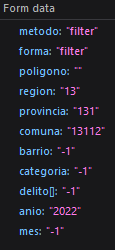

In [ ]:
# EJEMPLO
# Todos los delítos de La Pintana en todos los meses de 2022. Por todo grupo delictual y delito.
# data = 'metodo=filter&forma=filter&poligono=&region=13&provincia=131&comuna=13112&barrio=1664&categoria=-1&delito^%^5B^%^5D=-1&anio=2013&mes=-1'
# response = requests.post('https://siedt.spd.gov.cl/index.php/app/find_points', cookies=cookies, headers=headers, data=data)
# df = pd.DataFrame(response.json()['CP_data'])
# df['Comuna'] = 'La Pintana'
# df['Barrio'] = '6 DE MAYO'
# df

Obtener para cada barrio todos los delitos entre los años 2013 y 2022. La tabla finalmente tendrá:

Nombre Comuna, Nombre Barrio, +

 	y   x 	parte_id 	fecha 	hora 	rango 	clasificacion_parte 	source 	source_glosa 	estado 	lugar 	grupo_delictual 	delito 	riesgo_situacional 	descripcion_situacional 	denuncia_formal 	denuncia_informa

In [ ]:
with open('/content/drive/MyDrive/Universidad/Ipre/barrios_por_comuna_v2.pickle', 'rb') as handle:
    barrios_por_comuna = pickle.load(handle)

completados= set()

r = 0
for comuna in barrios_por_comuna:
  id_comuna =  barrios_por_comuna[comuna][0]
  barrios = barrios_por_comuna[comuna][1]
  for barrio in barrios:
    id_barrio = barrios[barrio][0]
    for año in range(2013,2023):
      if (comuna, barrio, año) not in completados:
        try:
          data = f'metodo=filter&forma=filter&poligono=&region=13&provincia=131&comuna={id_comuna}&barrio={id_barrio}&categoria=-1&delito^%^5B^%^5D=-1&anio={año}&mes=-1'
          response = requests.post('https://siedt.spd.gov.cl/index.php/app/find_points', cookies=cookies, headers=headers, data=data)
          df = pd.DataFrame(response.json()['CP_data'])
          df['Comuna'] = comuna
          df['ID_Comuna'] = id_comuna
          df['Barrio'] = barrio
          df['ID_Barrio'] = id_barrio
          nombre = comuna + "_" + barrio + "_" + str(año)
          df.to_csv(f'/content/drive/MyDrive/Universidad/Ipre/delitos/{nombre}.csv')
          # Conteo
          completados.add((comuna, barrio, año))
          r += 1
          print(round(r/30420*100, 2))
        except:
          with open('/content/drive/MyDrive/Universidad/Ipre/delitos_completados.pickle', 'wb') as handle:
              pickle.dump(completados, handle, protocol=pickle.HIGHEST_PROTOCOL)